# 09-2 순환 신경망으로 IMDB 리뷰 분류하기
텐서플로를 사용해 순환 신경망을 만들어 영화 리뷰 데이터셋에 적용해서 리뷰를 긍정과 부정으로 분류한다.

## IMDB 리뷰 데이터셋

텍스트 데이터의 경우 단어를 숫자 데이터로 바꾸는 일반적인 방법은 데이터에 등장하는 단어마다 고유한 정수를 부여하는 것이다.

단어에 매핑되는 정수는 단어의 의미나 크기와 무관하다. 예를 들어 'He'를 10으로 매핑하고 'cat'을 13에 매핑하더라도 'cat'이 'He'보다 좋거나 크다는 뜻이 아니다.

일반적으로 영어 문장은 모두 소문자로 바꾸고 구둣점을 삭제한 다음 공백을 기준으로 분리한다. 이렇게 분리된 단어를 토큰이라고 부른다. 하나의 샘플은 여러 개의 토큰으로 이루어져 있고 1개의 토큰이 하나의 타임스탬프에 해당한다.

실제 IMDB 리뷰 데이터셋은 영어 문장이지만, 텐서플로에는 이미 정수로 변환된 데이터가 포함되어 있다.

In [1]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
print(train_input.shape, test_input.shape)
# 1차원 배열
# 리뷰 텍스트를 고정 크기의 2차원 배열에 담지 않고 리뷰마다 별도의 파이썬 리스트로 담아 메모리 효율성을 높임.

(25000,) (25000,)


In [3]:
print(len(train_input[0]), len(train_input[1]))
# 리뷰마다 길이가 다름

218 189


In [4]:
print(train_input[0])
# 어휘 사전에는 500개의 단어만 들어가 있으며, 어휘 사전에 없는 단어는 모두 2로 표시
# 500개의 단어는 등장 횟수가 많은 상위 500개만 선정

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [5]:
print(train_target[:20])
# 0 : 부정, 1 : 긍정

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [6]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [7]:
import numpy as np
lengths = np.array([len(x) for x in train_input])

print(np.mean(lengths), np.median(lengths))
# 리뷰의 평균 단어 개수와 중간값 확인

239.00925 178.0


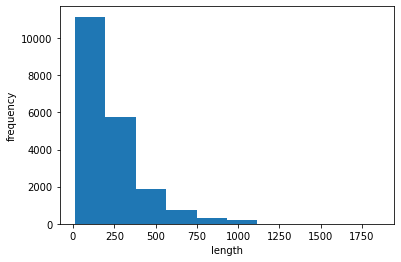

In [8]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
# pad_sequences() : 시퀀스 데이터의 길이를 맞춤
# maxlen보다 길면 잘라내고, 짧으면 0으로 패딩

print(train_seq.shape)

(20000, 100)


In [11]:
print(train_seq[0])
# 앞뒤에 패딩값 0이 없기에 샘플의 길이가 100보다 길었을 것이다.

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [13]:
print(train_input[0][-10:])
# 마지막 10개의 토큰 출력값. 이는 샘플 앞부분이 잘렸음을 시사
# 뒷부분을 자르고 싶다면 pad_sequences()의 truncating 매개변수의 값을 pre가 아닌 post로 바꾸면 된다.

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [14]:
print(train_seq[5])
# 앞에 패딩값 0이 있기에 샘플의 길이가 100보다 짧았을 것이다.

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [15]:
val_seq = pad_sequences(val_input, maxlen=100)
# 검증 세트의 길이도 100으로 맞춤

## 순환 신경망 만들기


In [18]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100,500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))
# (100,500) = (샘플의 길이, 배열의 길이)
# imdb.load_data() 함수에서 500개의 단어만 사용하도록 지정했기에 고유한 단어는 모두 500개
# 훈련 데이터에 포함될 수 있는 정숫값의 범위는 0~499, 이 범위를 원-핫 인코딩으로 표현하려면 배열의 길이가 500

In [19]:
train_oh = keras.utils.to_categorical(train_seq)
# 원-핫 인코딩을 위한 유틸리티

print(train_oh.shape)

(20000, 100, 500)


In [20]:
print(train_oh[0][0][:12])
# train_oh의 첫 번째 샘플의 첫 번째 토큰 10이 잘 인코딩되었는지 확인

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [21]:
print(np.sum(train_oh[0][0]))
# 11번째 원소만 1이고, 나머지는 0이어서 원-핫 인코딩된 배열의 값을 모두 더한 결과는 1

1.0


In [22]:
val_oh = keras.utils.to_categorical(val_seq)

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


## 순환 신경망 훈련하기

In [24]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 25ms/step - loss: 0.6955 - accuracy: 0.5096 - val_loss: 0.6913 - val_accuracy: 0.5290
Epoch 2/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6754 - accuracy: 0.5873 - val_loss: 0.6668 - val_accuracy: 0.6080
Epoch 3/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6531 - accuracy: 0.6380 - val_loss: 0.6486 - val_accuracy: 0.6454
Epoch 4/100
313/313 [==============================] - 9s 30ms/step - loss: 0.6326 - accuracy: 0.6729 - val_loss: 0.6294 - val_accuracy: 0.6770
Epoch 5/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6123 - accuracy: 0.6981 - val_loss: 0.6095 - val_accuracy: 0.7014
Epoch 6/100
313/313 [==============================] - 12s 38ms/step - loss: 0.5926 - accuracy: 0.7189 - val_loss: 0.5945 - val_accuracy: 0.7124
Epoch 7/100
313/313 [==============================] - 11s 37ms/step - loss: 0.5737 - accuracy: 0.7351 - val_loss: 0.5744 - val_accura

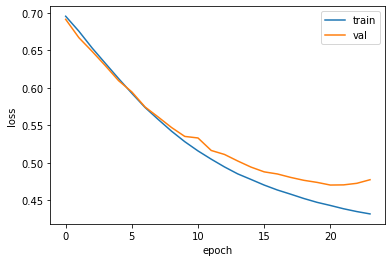

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

여기서 한 가지 생각할 점이 있는데, 이 작업을 하기 위해서는 입력 데이터를 원-핫 인코딩으로 변환했다. 하지만 원-핫 인코딩을 하면 입력 데이터가 엄청 커진다.

## 단어 임베딩 사용하기

순환 신경망에서 텍스트를 처리할 때 자주 사용하는 방법이다. **단어 임베딩**은 각 단어를 고정된 크기의 실수 벡터로 바꾸어 준다. 이런 단어 임베딩으로 만들어진 벡터는 원-핫 인코딩된 벡터보다 훨씬 의미 있는 값으로 채워져 있으므로 자연어 처리에서 더 좋은 성능을 내는 경우가 많다.

단어 임베딩의 장점은 입력으로 정수 데이터를 받는다는 것인데, 즉 원-핫 인코딩으로 변경된 train_oh 배열이 아니라 train_seq를 사용할 수 있다. 이는 메모리 효율성 증대를 가져옴.

In [27]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length=100))
# Embedding(어휘사전크기, 임베딩벡터크기, 입력시퀀스 길이)
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [28]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [30]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 14ms/step - loss: 0.6948 - accuracy: 0.5074 - val_loss: 0.6919 - val_accuracy: 0.5214
Epoch 2/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6902 - accuracy: 0.5314 - val_loss: 0.6902 - val_accuracy: 0.5358
Epoch 3/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6866 - accuracy: 0.5517 - val_loss: 0.6888 - val_accuracy: 0.5410
Epoch 4/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6814 - accuracy: 0.5734 - val_loss: 0.6833 - val_accuracy: 0.5648
Epoch 5/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6705 - accuracy: 0.6241 - val_loss: 0.6698 - val_accuracy: 0.6224
Epoch 6/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6531 - accuracy: 0.6819 - val_loss: 0.6533 - val_accuracy: 0.6768
Epoch 7/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6336 - accuracy: 0.7224 - val_loss: 0.6357 - val_accuracy:

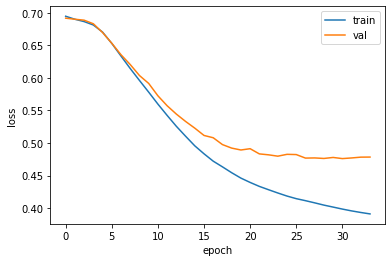

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()